# Challenge

In [28]:
import pickle_helper
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt

cpu_usage, total_page_views = pickle_helper.load('data/cpu_page_views_2.pickle')

The data represents the request rate (req/s) and cpu usage (%) data of our webserver over the past week, one point every 15 minutes, starting at 6 a.m.

Due to a marketing campaign we launch tomorrow, we expect more visitors than usual to our site between 13 and 14 pm, resulting in an expected request rate of 8.0 req/s. No changes will be done to our infrastructure. What is the expected cpu usage tomorrow between 13 and 14 pm?

# Solution

## First attempt

In [29]:
simple_lin_model = sklearn.linear_model.LinearRegression()
simple_lin_model.fit(total_page_views, cpu_usage)

target_page_views = 8.0

prediction = simple_lin_model.predict([[target_page_views]])[0]

print('The predicted value is:', prediction)

assert prediction < 25

The predicted value is: 24.9529184946


Let's take a closer look at the data:

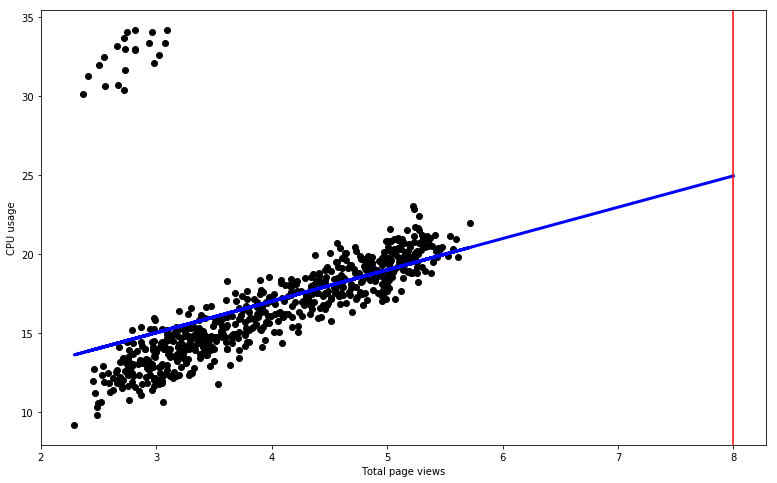

In [30]:
all_page_views = np.concatenate((total_page_views, [[target_page_views]]))

plt.figure(figsize=(13,8))

plt.scatter(total_page_views, cpu_usage,  color='black')
plt.plot(all_page_views, simple_lin_model.predict(all_page_views), color='blue', linewidth=3)
plt.axvline(8, color='r')

plt.xlabel("Total page views")
plt.ylabel("CPU usage")

plt.show()

The line does not fit really well due to a concentration of point in the upper left. Our CPU estimate will be on the low side. Let's take a look at the original data: 

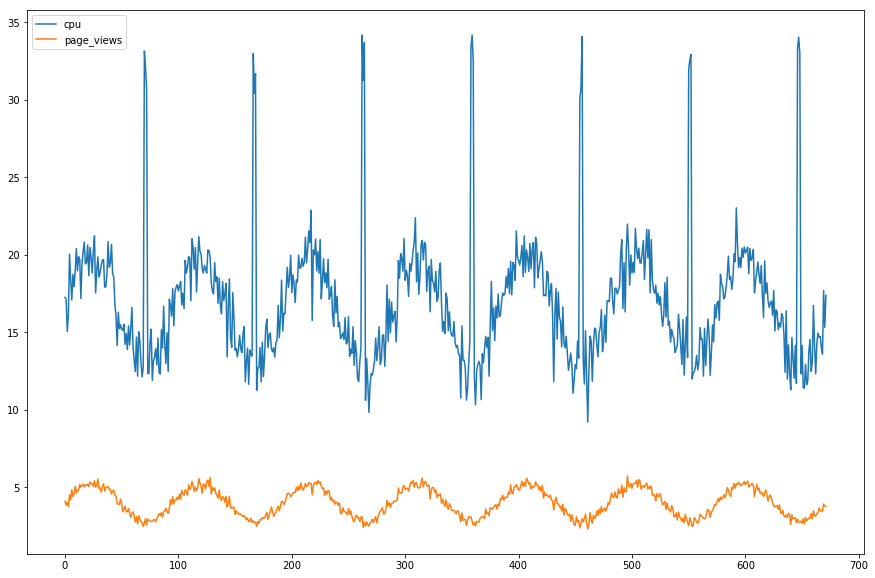

In [33]:
plt.plot(cpu_usage, label="cpu")
plt.plot(total_page_views, label="page_views")
plt.legend()
plt.show()

It seems during the night we have high CPU spikes unrelated to the requests (could be caused by a daily backup): it's better to leave them out. 

## 2nd attempt

The predicted value is: 28.3246536664


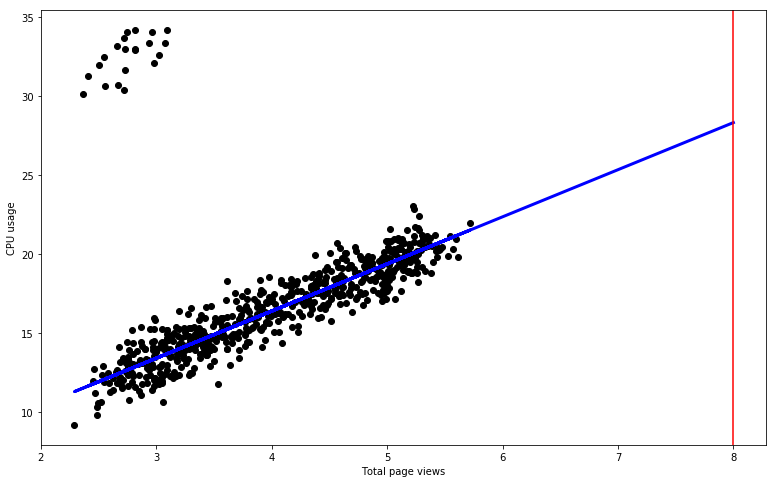

In [34]:
selection = cpu_usage < 25

simple_lin_model = sklearn.linear_model.LinearRegression()
simple_lin_model.fit(total_page_views[selection], cpu_usage[selection])
prediction = simple_lin_model.predict([[target_page_views]])[0]

print('The predicted value is:', prediction)

all_page_views = np.concatenate((total_page_views, [[target_page_views]]))

plt.figure(figsize=(13,8))

plt.scatter(total_page_views, cpu_usage,  color='black')
plt.plot(all_page_views, simple_lin_model.predict(all_page_views), color='blue', linewidth=3)
plt.axvline(target_page_views, color='r')

plt.xlabel("Total page views")
plt.ylabel("CPU usage")

plt.show()

assert prediction > 23

So the better prediction is 28.3 because it is not disturbed by the unrelated cpu spikes during the night. 


### Bottomline
Whatever modeling/machine learning techniques you use, don't use them blindly but try to understand the data, e.g. by visualizing it.